In [1]:
import pandas as pd
import datetime
import pytz
import glob

In [2]:
fnames = glob.glob("REES-112[4-9]2015.txt") + ["REES-11302015.txt"] + glob.glob("REES-12*.txt")


mesodata = []
for fname in fnames:
    date_string = fname[5:13]
#     basedate = datetime.datetime.strptime(date_string, '%m%d%Y')
    names = ['HHMM', 'AMPM', 'T', 'Td', 'wdir', 'wspd', 'wgst', 'altimeter', 'RH', 
             'rain', 'srad', 'T6.5', 'T30', 'dT30', 'wspd6.5'
            ]
    
    def parser(hhmm, ampm):
        date_parts = ' '.join((date_string, hhmm, ampm, 'CST'))
        date = datetime.datetime.strptime(date_parts,
                                   '%m%d%Y %I:%M %p %Z',
                                  )
#         # we must subract an hour to get to CST, which matches the November US/Central timezone.
#         one_hour = datetime.timedelta(0,3600.0)
#         date -= one_hour 
        return date
    
    d = pd.read_table(fname, sep='\s*',#delim_whitespace=True,
                    skiprows=10, skipfooter=15, date_parser=parser,
                    header=None, names=names, index_col=False, parse_dates={'UTC':[0,1]})
    
    print d['UTC'].min(), d['UTC'].max()
    
    
    mesodata.append(d)
        
thirteen = mesodata[0]
mesodata = pd.concat(mesodata)


mesodata = mesodata.set_index('UTC').resample('1S')
mesodata.index = mesodata.index.tz_localize(pytz.timezone('US/Central')).tz_convert(pytz.utc)

2015-11-24 00:05:00 2015-11-24 23:50:00
2015-11-25 00:05:00 2015-11-25 23:50:00
2015-11-26 00:05:00 2015-11-26 23:50:00
2015-11-27 00:05:00 2015-11-27 23:50:00
2015-11-28 00:05:00 2015-11-28 18:55:00
2015-11-29 00:05:00 2015-11-29 23:50:00
2015-11-30 00:05:00 2015-11-30 23:50:00
2015-12-01 00:05:00 2015-12-01 23:50:00
2015-12-02 00:05:00 2015-12-02 23:50:00
2015-12-03 00:05:00 2015-12-03 23:50:00


/Users/ebruning/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [3]:
mesodata

,Td,wdir,wspd,wgst,altimeter,RH,rain,srad,T6.5,T30,dT30,wspd6.5
UTC,,,,,,,,,,,,
2015-11-24 06:05:00+00:00,31,196,11,15,30.07,63,0,0,44.5,45.0,-0.5,6
2015-11-24 06:05:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-24 06:05:02+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-24 06:05:03+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-24 06:05:04+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-24 06:05:05+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-24 06:05:06+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-24 06:05:07+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-24 06:05:08+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
names = ['day', 'mon', 'date', 'hms', 'zone', 'year', 
         'V_load', 'V_batt', 'V_PV', 'I_load', 'I_batt', 'I_PV'
        ]
usecols=[0 ,1 ,2 ,3 ,4 ,5 ,9 ,13,17,21,25,29,]


def parser(*args):
    ds = ' '.join(args)
    date = datetime.datetime.strptime(ds,
                               '%a %b %d %H:%M:%S %Z %Y:',
                              )
    return date

lma_pwr = pd.read_table('voltage_log_R_cloudy.log', sep='\s*',#delim_whitespace=True,
                usecols=usecols, date_parser=parser, #skiprows=10, skipfooter=15, 
                header=None, names=names, index_col=False, parse_dates={'UTC':[0,1,2,3,4,5]})

lma_pwr = lma_pwr[lma_pwr['UTC']>datetime.datetime(2015,11,23)]
lma_pwr = lma_pwr.set_index('UTC').resample('1S')

lma_pwr.index = lma_pwr.index.tz_localize(pytz.utc).tz_convert(pytz.utc)

In [23]:
lma_pwr

,V_load,V_batt,V_PV,I_load,I_batt,I_PV
UTC,,,,,,
2015-11-23 00:08:05+00:00,11.721,12.443,1.247,1.500,1.500,0.000
2015-11-23 00:08:06+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-23 00:08:07+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-23 00:08:08+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-23 00:08:09+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-23 00:08:10+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-23 00:08:11+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-23 00:08:12+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-23 00:08:13+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
combo = mesodata.join(lma_pwr)
combo.plot

<bound method DataFrame.plot_frame of                            Td  wdir  wspd  wgst  altimeter  RH  rain  srad  \
UTC                                                                          
2015-11-24 06:05:00+00:00  31   196    11    15      30.07  63     0     0   
2015-11-24 06:05:01+00:00 NaN   NaN   NaN   NaN        NaN NaN   NaN   NaN   
2015-11-24 06:05:02+00:00 NaN   NaN   NaN   NaN        NaN NaN   NaN   NaN   
2015-11-24 06:05:03+00:00 NaN   NaN   NaN   NaN        NaN NaN   NaN   NaN   
2015-11-24 06:05:04+00:00 NaN   NaN   NaN   NaN        NaN NaN   NaN   NaN   
2015-11-24 06:05:05+00:00 NaN   NaN   NaN   NaN        NaN NaN   NaN   NaN   
2015-11-24 06:05:06+00:00 NaN   NaN   NaN   NaN        NaN NaN   NaN   NaN   
2015-11-24 06:05:07+00:00 NaN   NaN   NaN   NaN        NaN NaN   NaN   NaN   
2015-11-24 06:05:08+00:00 NaN   NaN   NaN   NaN        NaN NaN   NaN   NaN   
2015-11-24 06:05:09+00:00 NaN   NaN   NaN   NaN        NaN NaN   NaN   NaN   
2015-11-24 06:05:10+00:00 

(0, 1000)

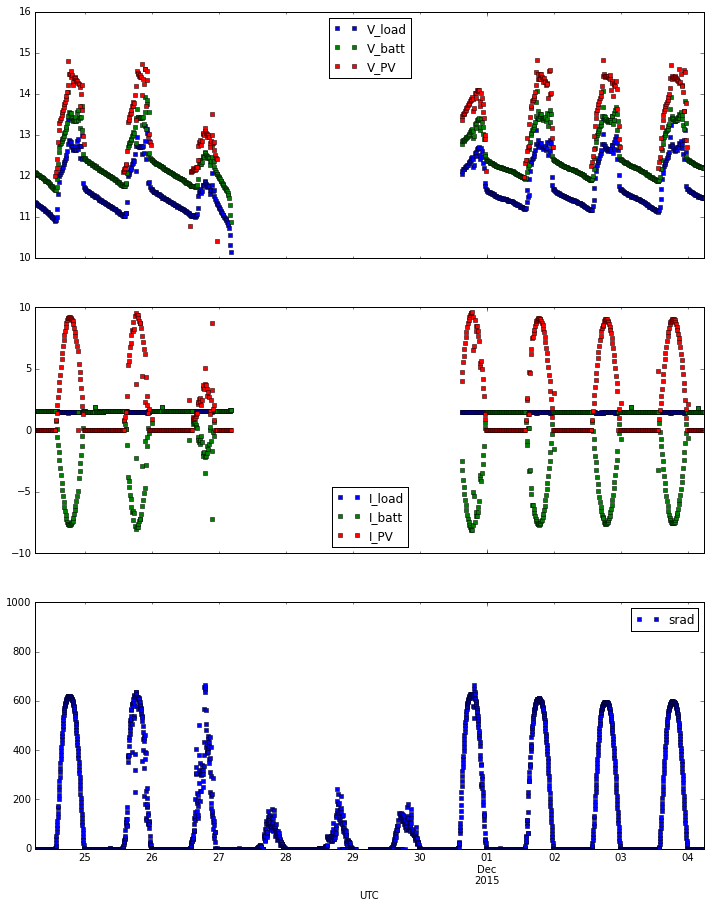

In [26]:
figsize=(12,5*3)
fig = plt.figure(figsize=figsize)
ax_V = fig.add_subplot(3,1,1)
ax_I = fig.add_subplot(3,1,2)
ax_rad = fig.add_subplot(3,1,3)

plot_kw = dict(marker='s', linestyle='none', ms=4, sharex=ax_V)
plot_kw['ax']=ax_V
combo.ix[:,('V_load', 'V_batt', 'V_PV')].plot(**plot_kw)
plot_kw['ax']=ax_I
combo.ix[:,('I_load', 'I_batt', 'I_PV')].plot(**plot_kw)
plot_kw['ax']=ax_rad
combo.ix[:,('srad',)].plot(**plot_kw)

ax_V.set_ylim(10,16)
ax_I.set_ylim(-10,10)
ax_rad.set_ylim(0,1000)

In [27]:
fig.savefig('cloudy_lma_solar_test_R_oldcharger_Nov24-Dec3.pdf')
# ax_V.figure.savefig('cloudy_lma_solar_test_V_Nov24-Dec3.pdf')
# ax_I.figure.savefig('cloudy_lma_solar_test_I_Nov24-Dec3.pdf')
# ax_rad.figure.savefig('cloudy_lma_solar_test_rad_Nov24-Dec3.pdf')

In [287]:
thirteen = thirteen.set_index('UTC')
thirteen.index = thirteen.index.tz_localize(pytz.timezone('US/Central')).tz_convert(pytz.utc)

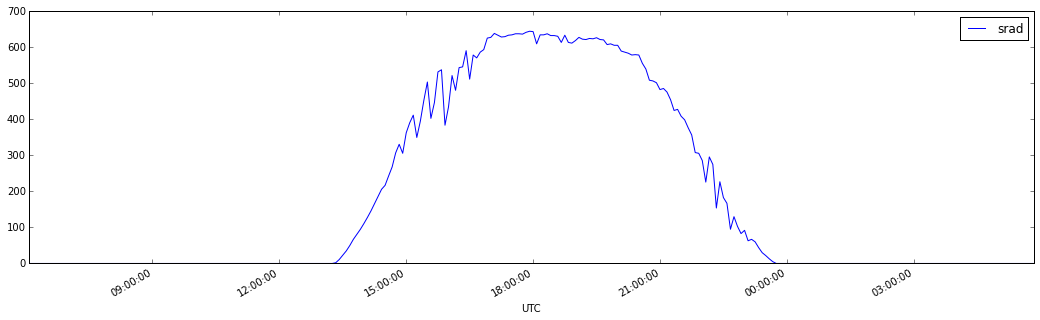

In [288]:
thirteen.ix[:,('srad',)].plot(figsize=(18,5))

In [ ]:

url = "http://meso-web1.tosm.ttu.edu/Tech/mtr/Reese%20Center-11182015.txt"